## Шаг 1. Загрузите данные

<b>«Культурист-датасаентист»</b> предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц.
Набор данных включает следующие поля:

- 'Churn' — факт оттока в текущем месяце;

#### Текущие поля в датасете:

Данные пользователя за предыдущий до проверки факта оттока месяц:

- 'gender' — пол
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент в таком случае фитнес-центр хранит информацию о работодателе клиента)
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
- 'Phone' — наличие контактного телефона
- 'Age' — возраст
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)

#### Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
- 'Group_visits' — факт посещения групповых занятий
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

#### Путь к файлу

- <b>Путь к файлу</b>: /datasets/gym_churn.csv

## Шаг 2. Проведите исследовательский анализ данных (EDA)

- Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
- Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
- Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- Постройте матрицу корреляций и отобразите её.

## Шаг 3. Постройте модель прогнозирования оттока пользователей

#### Постройте модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце:

- Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
- Обучите модель на train-выборке любыми двумя способами: логистической регрессией и случайным лесом.
- Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

## Шаг 4. Сделайте кластеризацию пользователей

#### Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (пользователей):

- Стандартизируйте данные.
- Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
- Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
- Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
- Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
- Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

## Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

#### Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с пользователями и их удержания. Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.


In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
pd.set_option('display.max_columns', None)

## Шаг 1. Загрузите данные

In [3]:
df: pd.DataFrame = pd.read_csv('/datasets/gym_churn.csv')

In [4]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
df.columns = df.columns.str.lower()

In [6]:
display(df.info())
display(df.isna().sum())
display(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


None

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

0

<div class="alert alert-info">
    <h2> Комментарий учащегося</h2>
    
Данные загружены, полных дубликатов нет, пропущенных значений тоже, преобразование типов не нужно.
</div>

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


In [9]:
df.groupby('churn').agg('mean').T.style.highlight_max(axis=1)

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.74719,1.72856
group_visits,0.464103,0.268615
age,29.9765,26.9896
avg_additional_charges_total,158.446,115.083
month_to_end_contract,5.28309,1.66258


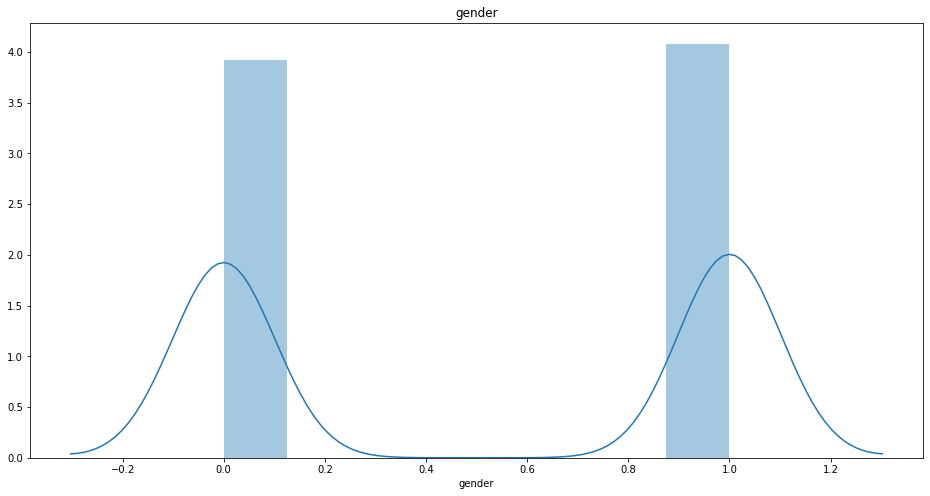

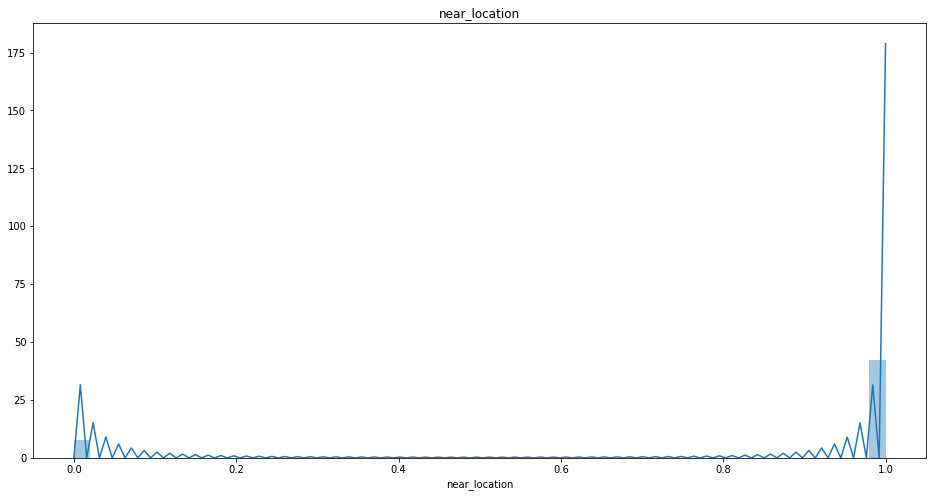

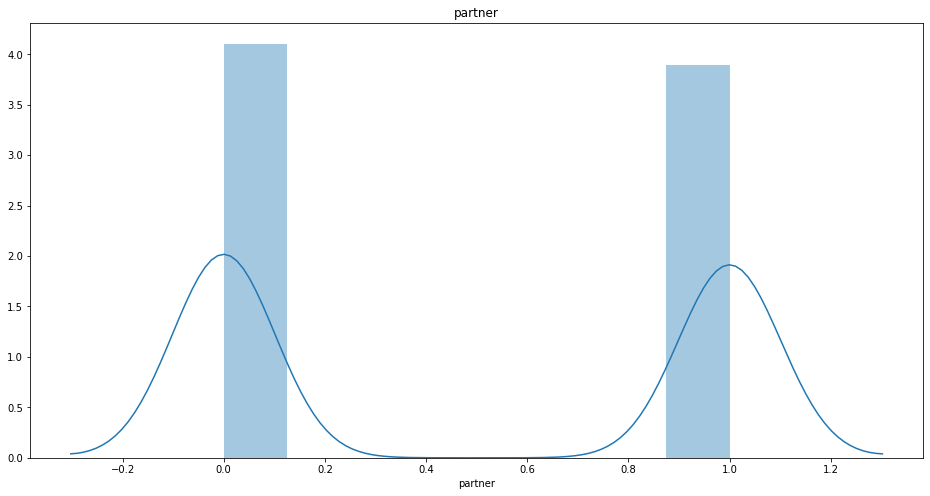

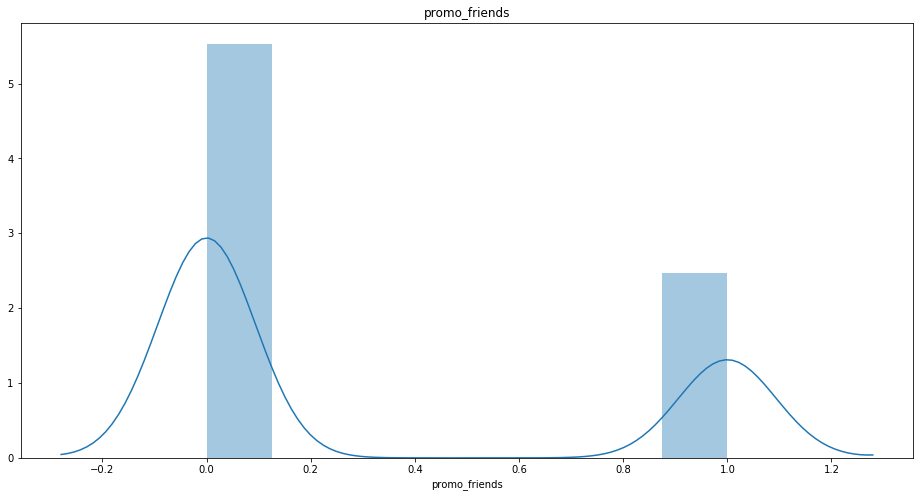

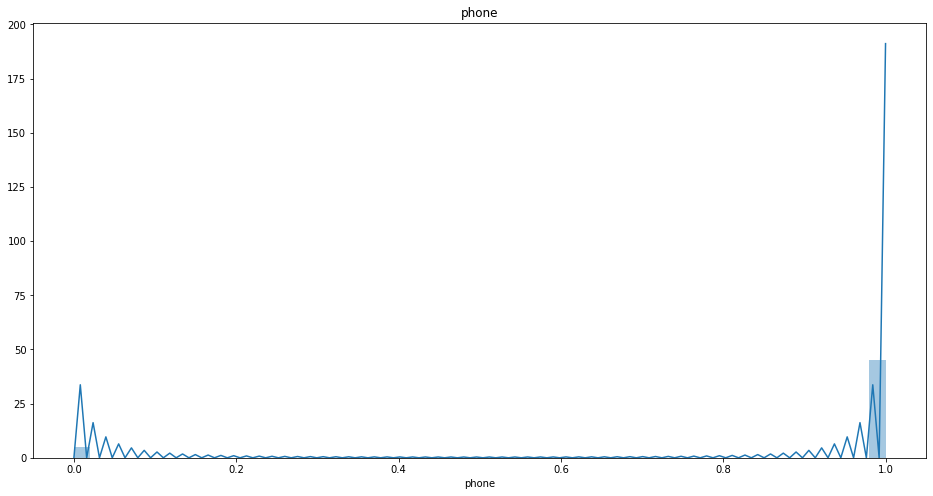

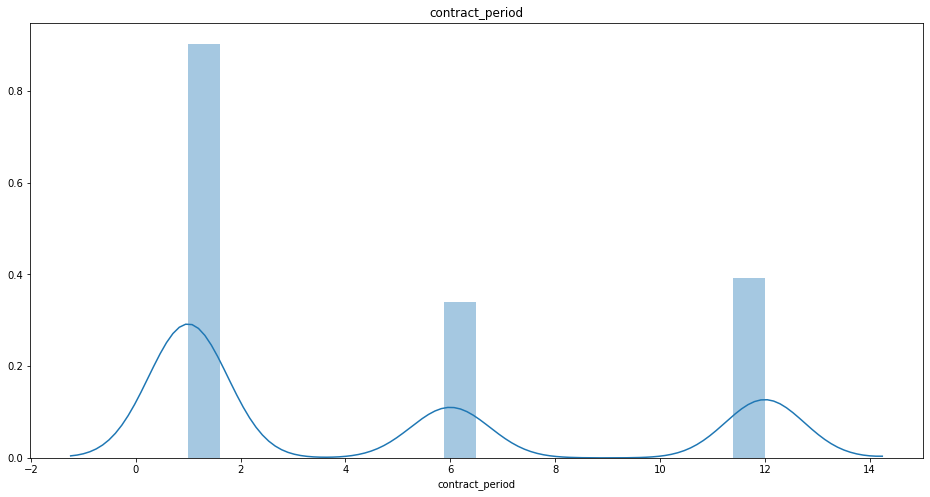

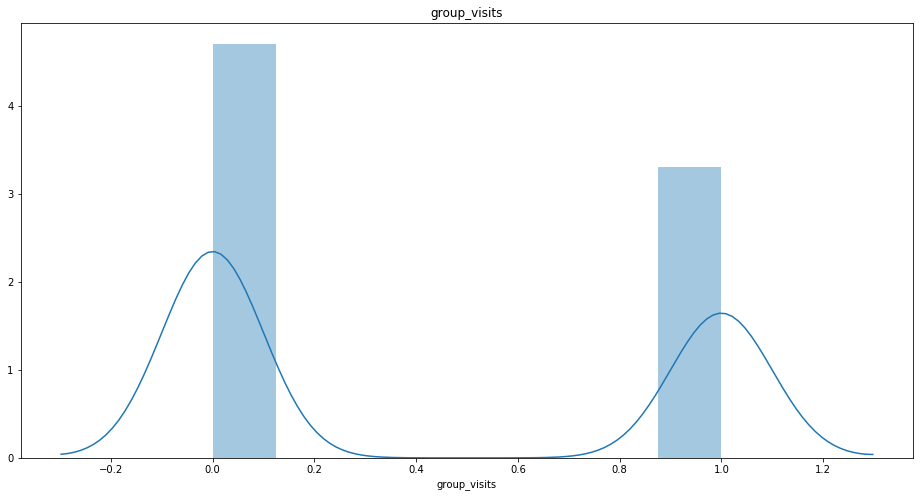

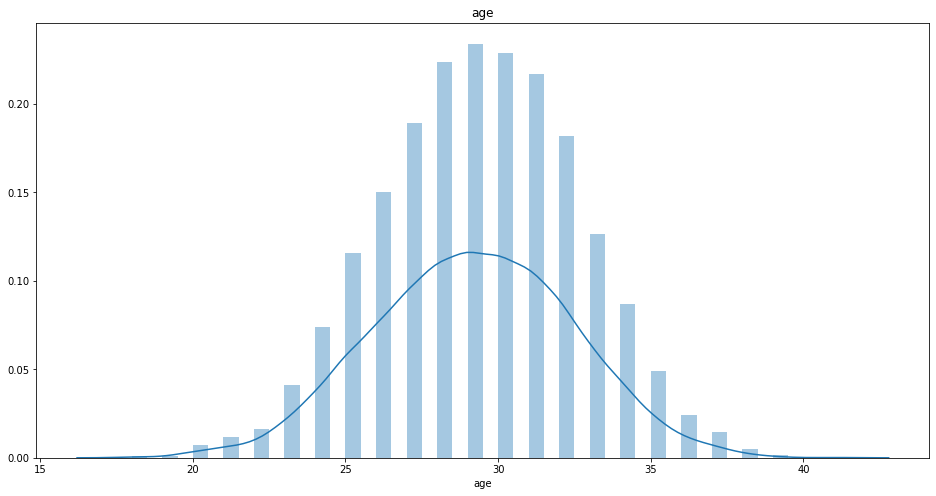

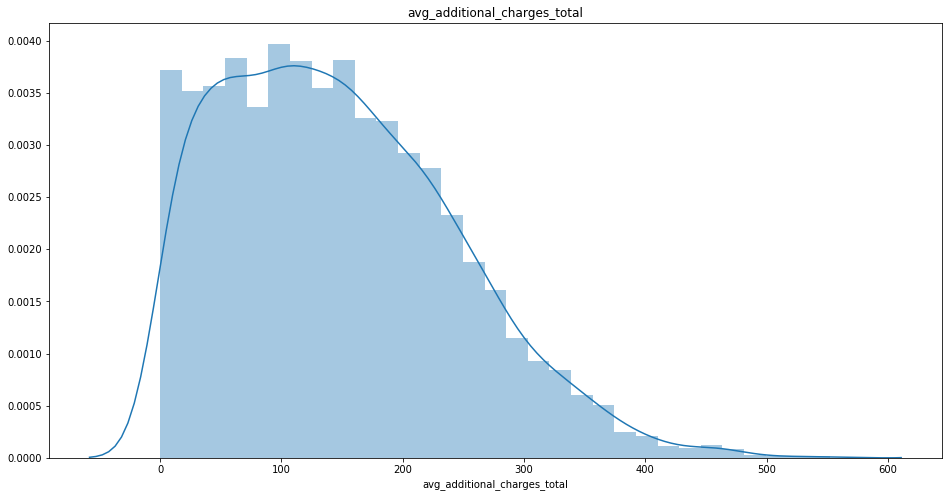

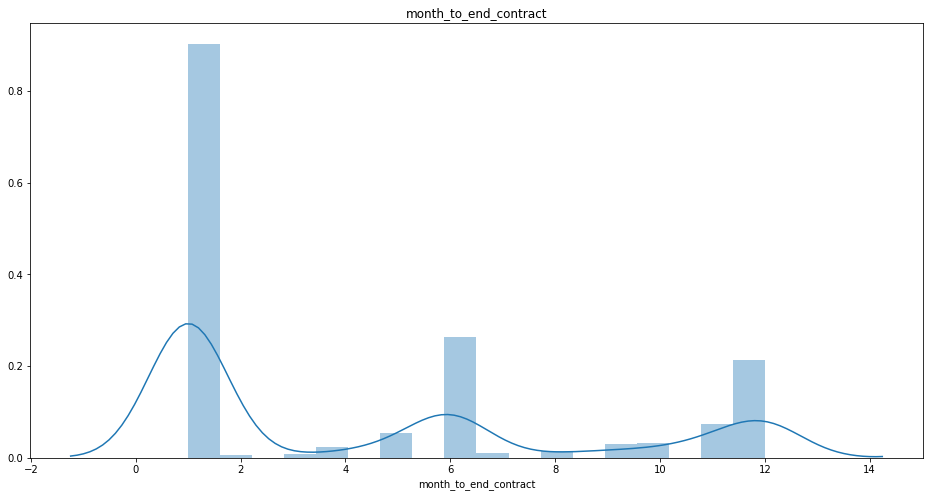

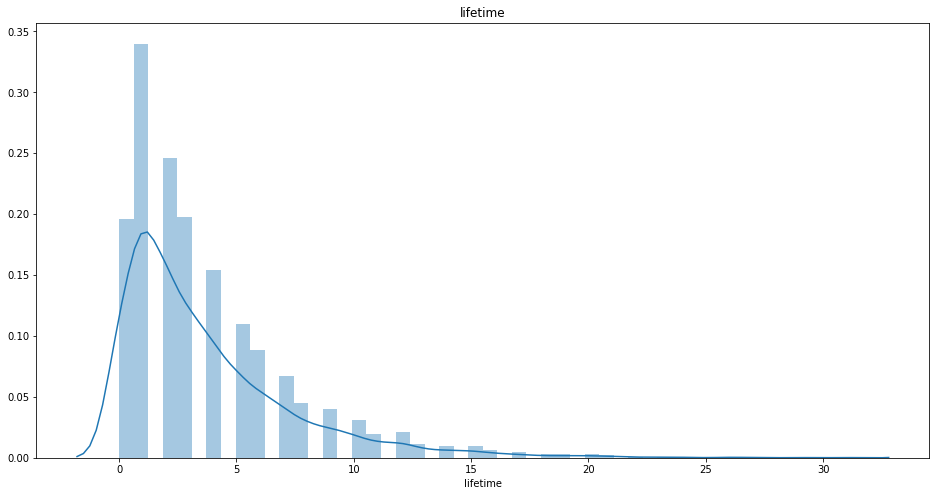

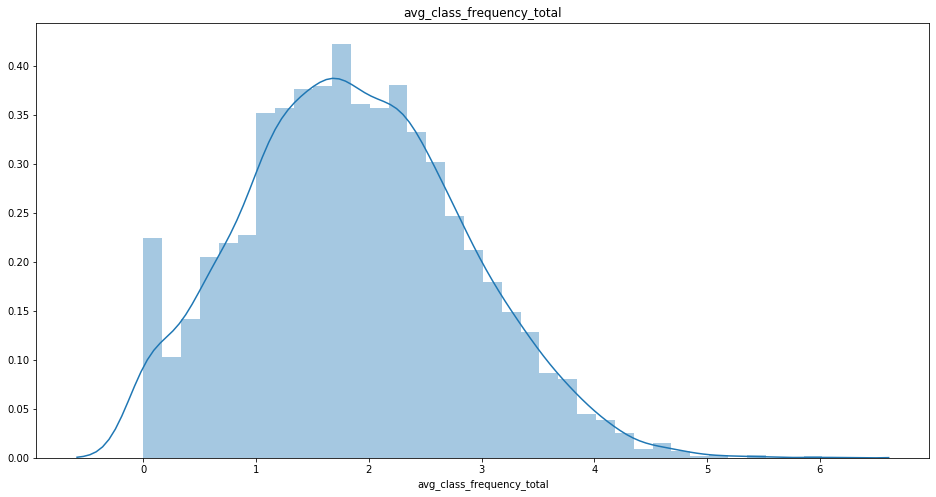

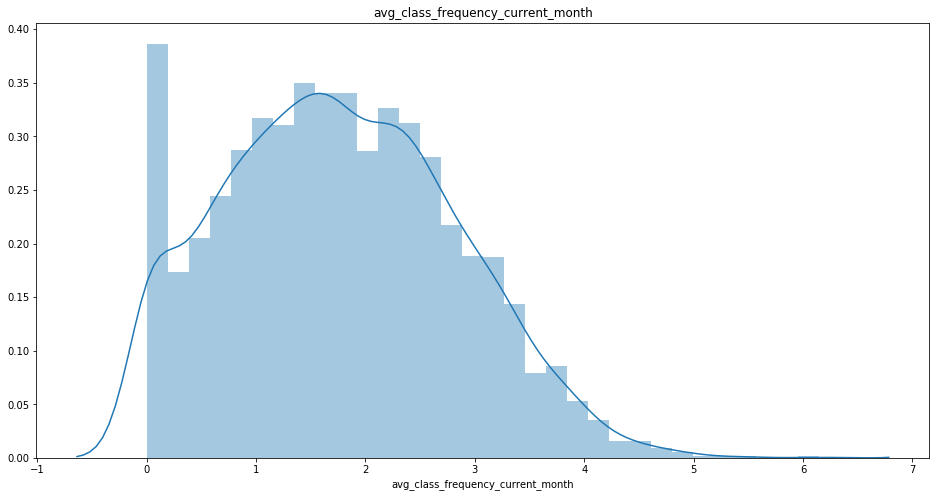

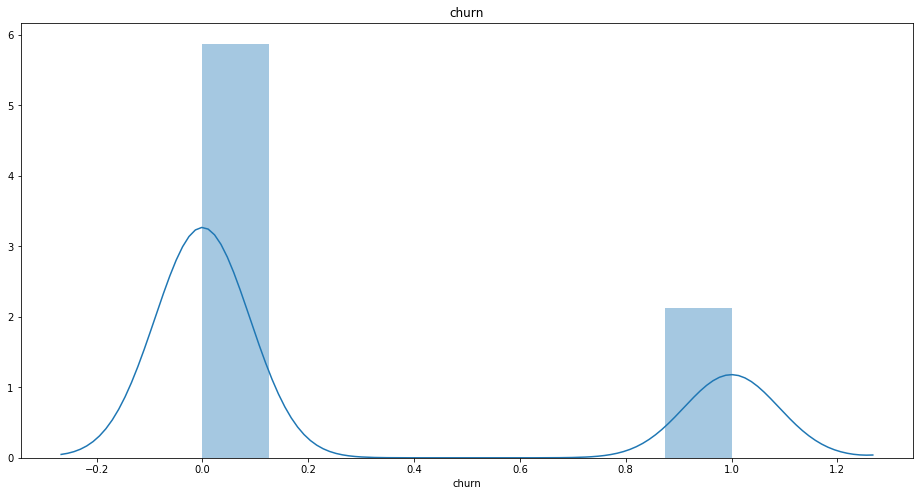

In [10]:
for column in df.columns:
    plt.figure(figsize=(16, 8))
    sns.distplot(df[column])
    plt.title(column)
    plt.show()

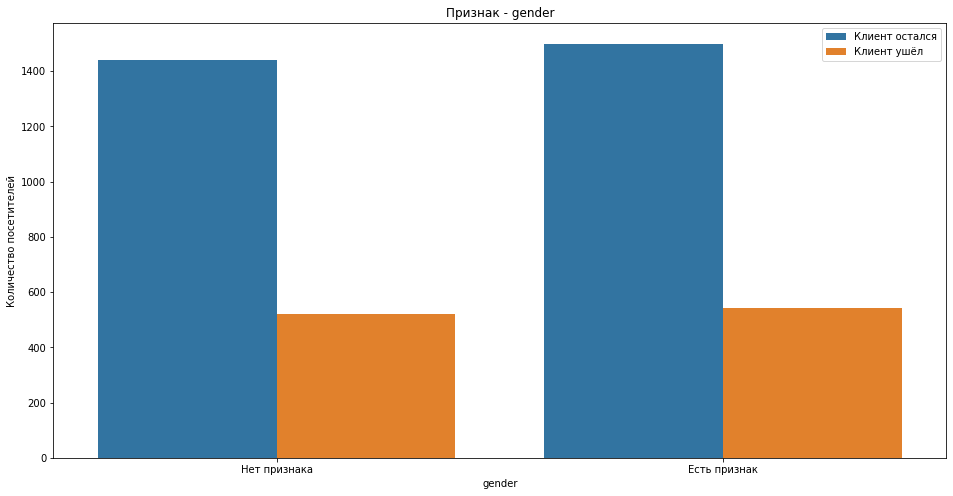

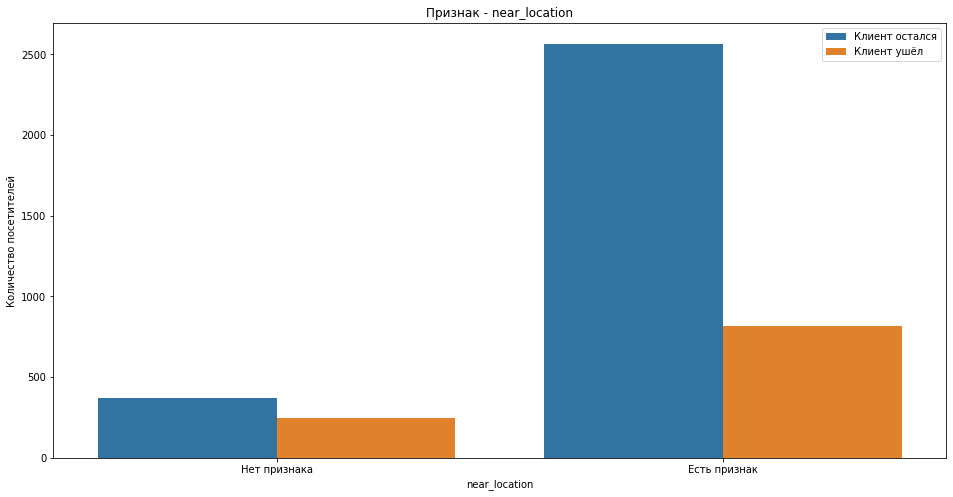

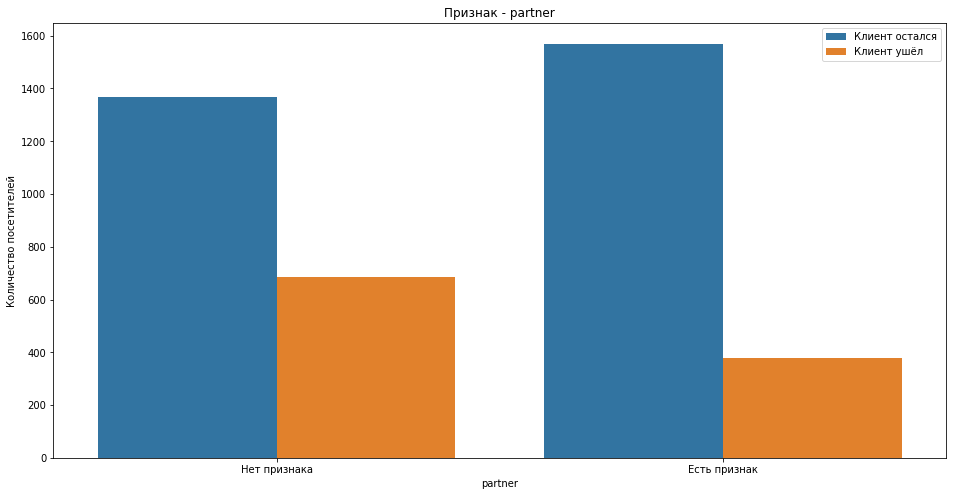

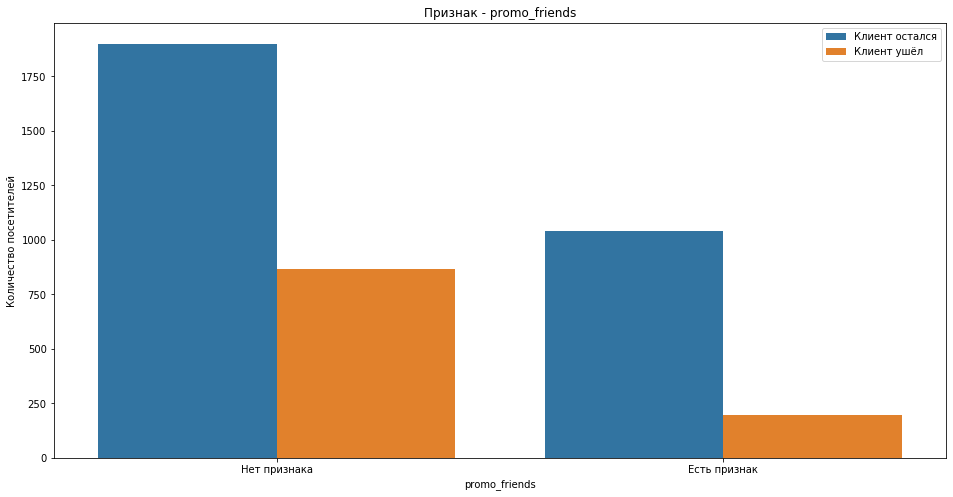

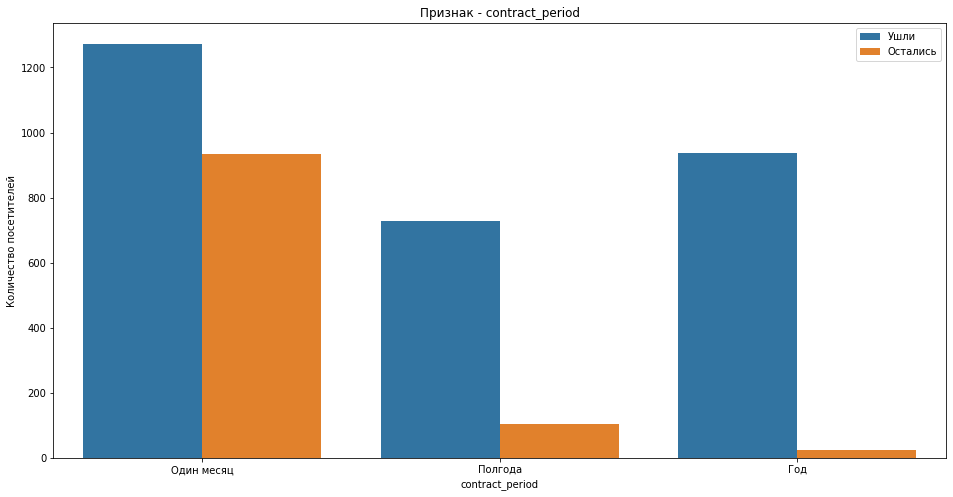

In [48]:
for column in ['gender', 'near_location', 'partner', 'promo_friends']:
    plt.figure(figsize=(16, 8))
    sns.countplot(x=df[column], hue='churn', data=df)
    plt.title('Признак - ' + column)
    plt.legend(labels=('Клиент остался', 'Клиент ушёл'))
    plt.xticks((0, 1), ('Нет признака', 'Есть признак'))
    plt.ylabel('Количество посетителей')
    #plt.show()

# в поле 'contract_period' присутствует 3 признака вместо обычных 2х
plt.figure(figsize=(16, 8))
sns.countplot(x=df['contract_period'], hue='churn', data=df)
plt.title('Признак - ' + 'contract_period')
plt.legend(labels=('Ушли', 'Остались'))
plt.xticks((0, 1, 2), ('Один месяц', 'Полгода', 'Год'))
plt.ylabel('Количество посетителей')
plt.show()    

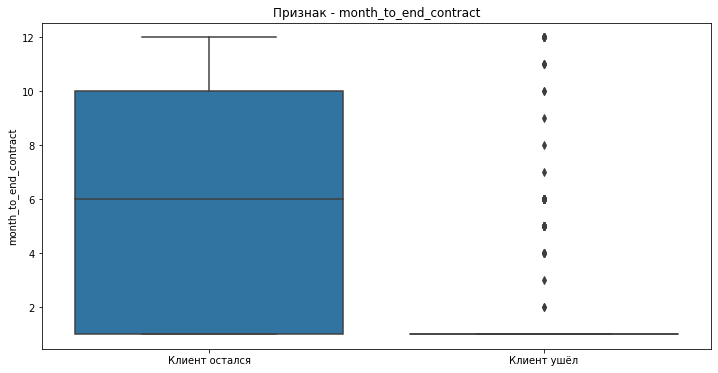

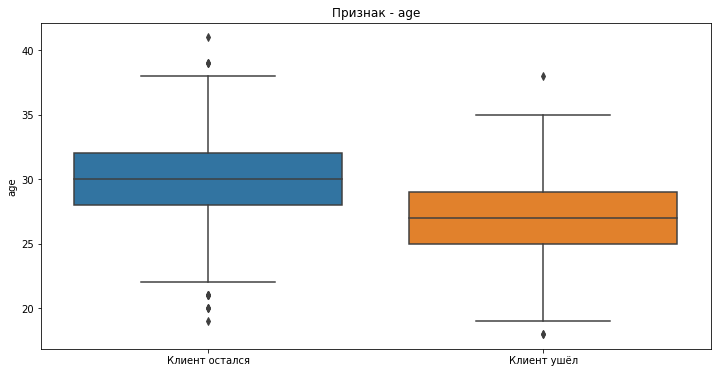

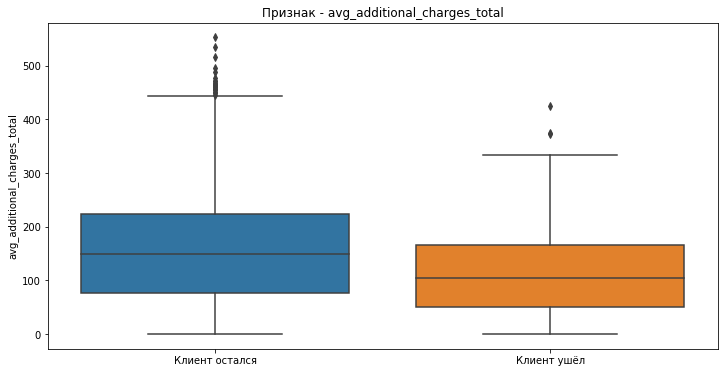

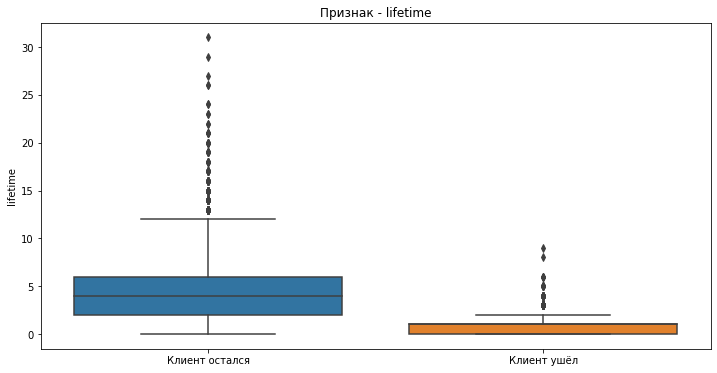

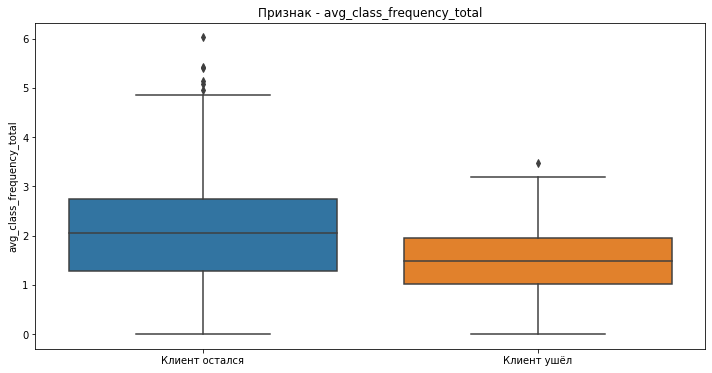

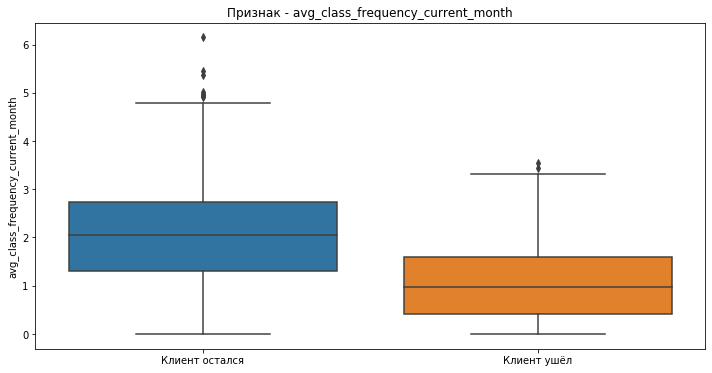

In [39]:
for column in [
                  'month_to_end_contract', 
                  'age', 
                  'avg_additional_charges_total',
                  'lifetime', 
                  'avg_class_frequency_total', 
                  'avg_class_frequency_current_month'
              ]:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='churn', y=df[column], data=df)
    plt.xticks((0, 1), ('Клиент остался', 'Клиент ушёл'))
    plt.xlabel('')
    plt.title('Признак - ' + column)
    plt.show()

<div class="alert alert-info">
    <h2> Комментарий учащегося</h2>

Из графиков выше можно сделать вывод о следующем:    
    
- между уходом клиента и его полом / наличием его телефона в базе клиентов нет зависимости;
- есть связь между уходом клиента и тем, являлся ли клиент сотрудником компании-партнера, пришел ли он по акции "приведи друга", живет/работает ли он недалеко от центра, посещал ли групповые занятия;
- у ушедших клиентов в подавляющем большинстве случаев был короткий абонемент на месяц;
- частота посещения зала у ушедших клиентов в среднем была ниже, чем у тех, кто остался;
- ушедшие клиенты в среднем моложе оставшихся;
- распределение признака lifetime у ушедших клиентов концентрируется в районе 0-1-2 месяцев - это может быть связано с покупкой коротких абонементов этими клиентами ("на попробовать"), и, вероятно, этого срока недостаточно для конвертации клиента в постоянного посетителя;
- траты на дополнительные услуги в среднем ниже у ушедших клиентов.


</div>

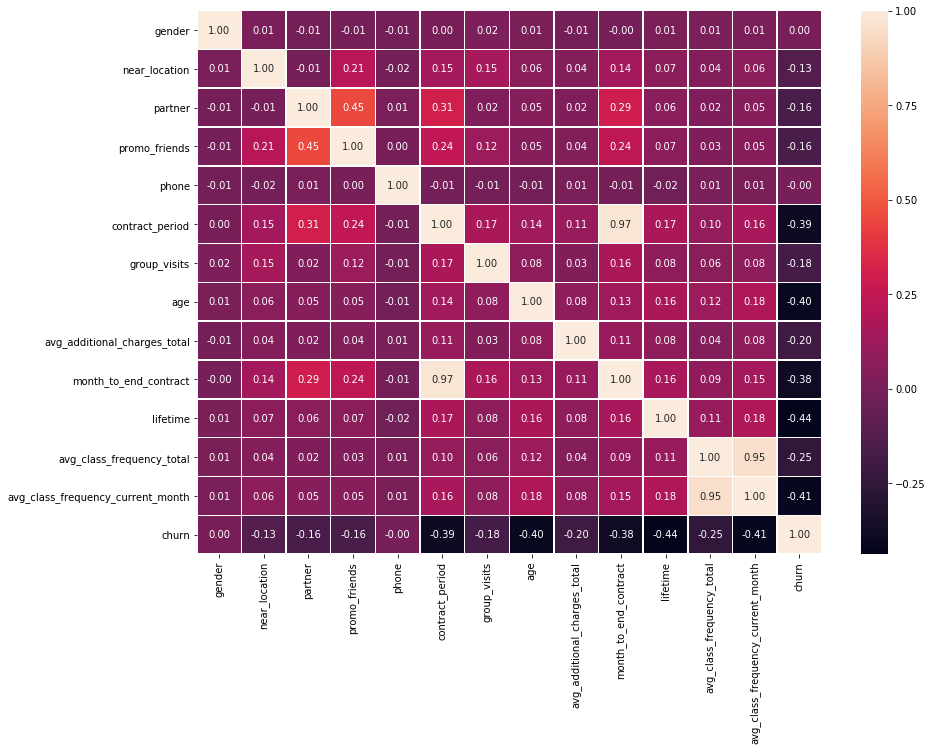

In [13]:
cm = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='0.2f', linewidths=.5)
plt.show()

<div class="alert alert-info">
    <h2> Комментарий учащегося</h2>
    
Из матрицы корреляции мы видим присутствие мультиколлинеарных признаков, а именно:

- contract_period - month_to_end_contract
- avg_class_frequency_current_month - avg_class_frequency_total

Кроме того, в матрице есть признаки с нулевой корреляцией (для целевой переменной):

- phone
- gender


</div>

## Шаг 3. Постройте модель прогнозирования оттока пользователей

In [14]:
X = df.drop('churn', axis=1)
y = df['churn']

#### Логистическая регрессия

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

print('Accuracy | Нет баланса классов: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy | Нет баланса классов: 0.93
Precision: 0.86
Recall: 0.83
F1: 0.85


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Случайный лес

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

print('Accuracy | Нет баланса классов: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy | Нет баланса классов: 0.92
Precision: 0.84
Recall: 0.81
F1: 0.83


<div class="alert alert-info">
    <h2> Комментарий учащегося</h2>
    
Метрики модели на основе логистической регрессии оказались выше, то есть логистическая регрессия в нашем случае работает лучше.


</div>

## Шаг 4. Сделайте кластеризацию пользователей

In [18]:
df_sс = df.drop(['churn'], axis=1)
df_columns_list = df_sс.columns
df_sс = StandardScaler().fit_transform(df_sс)
df_sс = pd.DataFrame(df_sс, columns=df_columns_list).astype('float64')

In [19]:
linked = linkage(df_sс, method = 'ward')

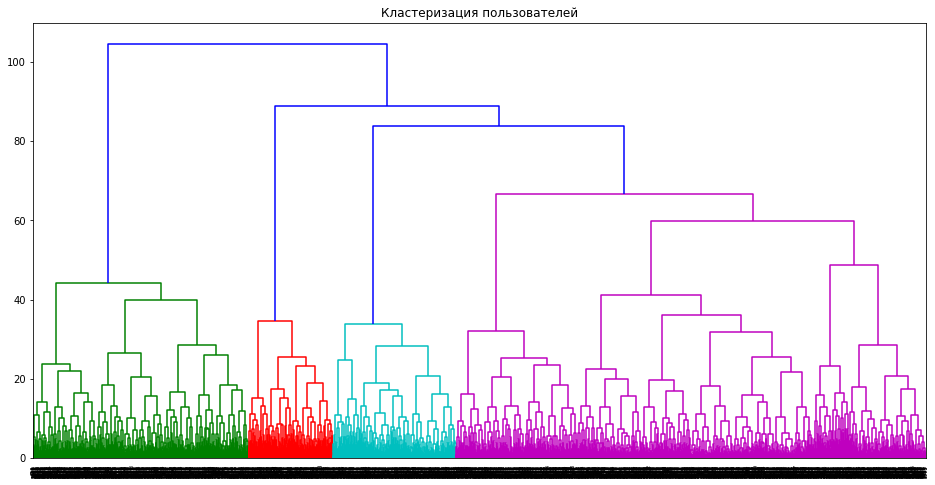

In [20]:
plt.figure(figsize=(16, 8))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

In [21]:
km = KMeans(n_clusters=5)
labels = km.fit_predict(df_sс)
df['cluster'] = labels

In [22]:
df.cluster.value_counts()

1    1262
2    1003
0     845
3     505
4     385
Name: cluster, dtype: int64

In [23]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.56,0.49,0.50,0.50,0.52
near_location,0.98,1.00,0.96,0.00,0.86
partner,0.36,0.35,0.78,0.46,0.47
promo_friends,0.24,0.24,0.57,0.08,0.31
phone,1.00,1.00,1.00,1.00,0.00
contract_period,2.69,1.95,10.92,2.35,4.79
group_visits,0.47,0.34,0.55,0.22,0.43
age,30.11,28.17,29.99,28.48,29.30
avg_additional_charges_total,161.82,131.41,160.88,135.46,143.96
month_to_end_contract,2.48,1.86,9.98,2.20,4.48


<div class="alert alert-info">
    <h2> Комментарий учащегося</h2>
    
На основе полученных кластеров выделим группы клиентов:

<b>Кластер 1</b> - группа с самой высокой долей оттока - 51%:
- те, кто живет или работает рядом с фитнес-центром
- средний возраст 28 лет - клиенты моложе, чем типичный пользователь фитнес-сети
- чаще всего не сотрудник компании-партнера
- это клиенты, чаще всего приходящие не через акции "приведи друга"
- это клиенты, пришедшие на короткий контракт (1-3 месяца)
- это клиенты, реже посещающие групповые тренировки, и в принципе реже посещающие зал
- средний лайфтайм такого клиента составляет 2.5 месяца - то есть клиент не успевает конвертироваться в лояльного пользователя сети
- это клиенты, тратящие меньше на доп.услуги (возможно, это следствие маленького лайфтайма)

<b>Кластер 3</b> - доля оттока 44%:
- те, кто живет или работает НЕ рядом с фитнес-центром
- средний возраст 28 лет - клиенты моложе, чем типичный пользователь фитнес-сети
- в половине случаев клиенты являются сотрудниками компании-партнера
- это клиенты, чаще всего приходящие не через акции "приведи друга"
- это клиенты, пришедшие на короткий контракт (1-3 месяца)
- это клиенты, реже посещающие групповые тренировки, и в принципе реже посещающие зал
- это клиенты, тратящие меньше на доп.услуги (возможно, это следствие маленького лайфтайма)
- средний лайфтайм такого клиента составляет ~3 месяца - то есть клиент не успевает конвертироваться в лояльного пользователя сети

<b>Кластер 4</b> - доля оттока - 27%:
- средний возраст 29 лет
- это клиенты, пришедшие на короткий контракт (3-6 месяца) - - группа с долей оттока - 27%:
- это клиенты, часто живущие или работающие рядом с фитнес-центром
- в половине случаев клиенты этой группы являются сотрудниками компании-партнера
- это клиенты, приходящие через акции "приведи друга" только в трети случаев
- средний лайфтайм такого клиента составляет 4 месяца
- относительно часто посещающие групповые тренировки

<b>Кластер 0</b> - доля оттока - 7%:
- средний возраст 30 лет
- это клиенты, чаще всего живущие или работающие рядом с фитнес-центром
- в трети случаев клиенты этой группы являются сотрудниками компании-партнера
- только пятая часть кластера пришла через акции "приведи друга"
- это клиенты, пришедшие на короткий контракт (3 месяца)
- эта группа клиентов чаще других посещает групповые тренировки
- это клиенты, тратящие на доп.услуги в среднем больше
- средний лайфтайм такого клиента составляет почти 5 месяцев    
    
<b>Кластер 2</b> - доля оттока - 3%:
- средний возраст 30 лет
- это клиенты, чаще всего живущие или работающие рядом с фитнес-центром
- чаще всего клиенты являются сотрудниками компании-партнера
- это клиенты, приходящие через акции "приведи друга" больше чем в половине случаев
- это клиенты на долгих контрактах - от 6 до 12 месяцев
- эта группа клиентов чаще других посещает групповые тренировки
- это клиенты, тратящие на доп.услуги в среднем больше
- средний лайфтайм такого клиента составляет почти 5 месяцев




</div>

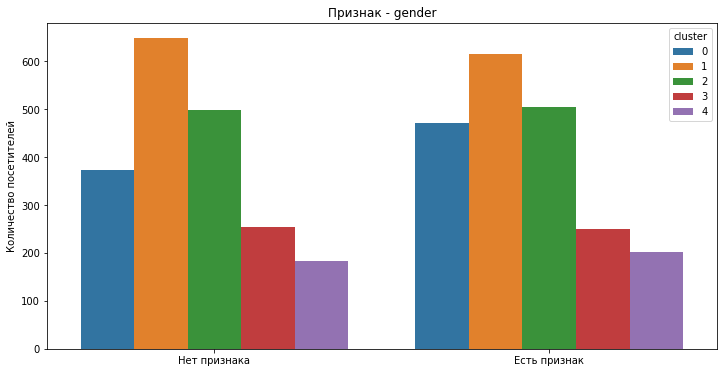

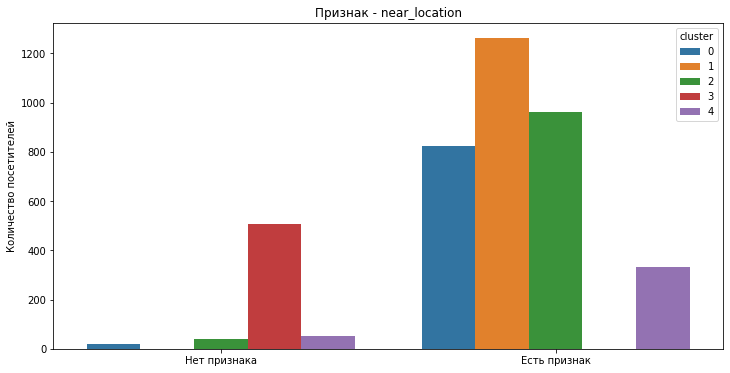

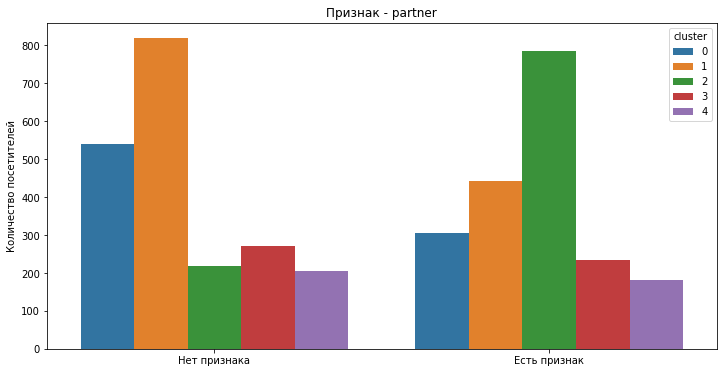

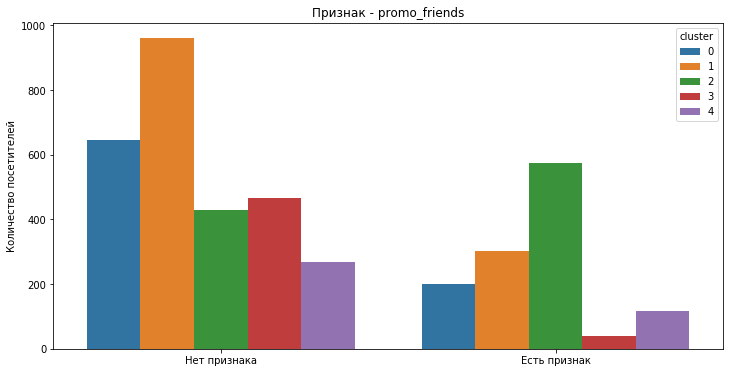

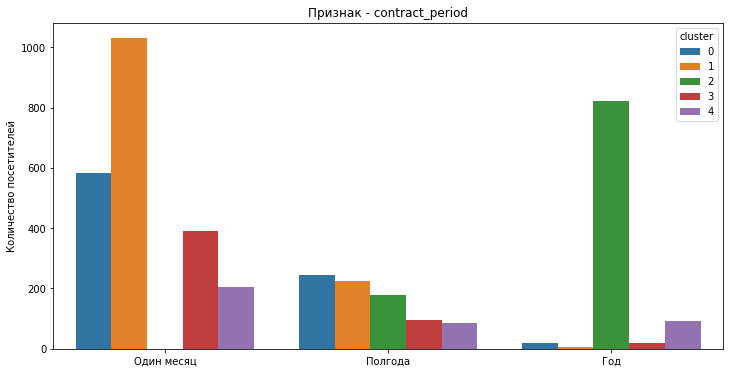

In [49]:
for column in ['gender', 'near_location', 'partner', 'promo_friends']:
    plt.figure(figsize=(12, 6))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title('Признак - ' + column)
    plt.xticks((0, 1), ('Нет признака', 'Есть признак'))
    plt.xlabel('')
    plt.ylabel('Количество посетителей')
    

plt.figure(figsize=(12, 6))
sns.countplot(x = df['contract_period'], hue='cluster', data=df)
plt.title('Признак - ' + 'contract_period')
plt.xticks((0, 1, 2), ('Один месяц', 'Полгода', 'Год')) 
plt.xlabel('')
plt.ylabel('Количество посетителей')
plt.show()

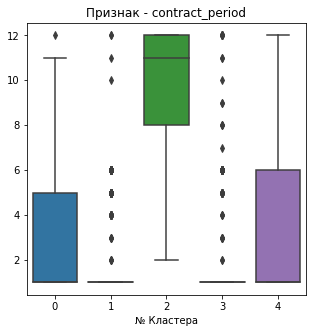

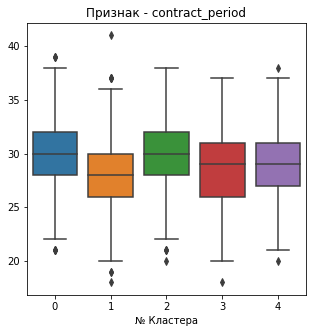

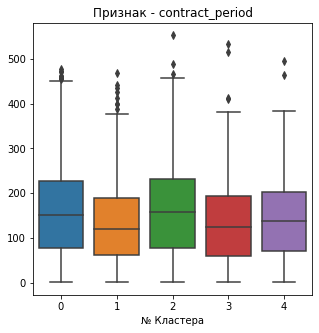

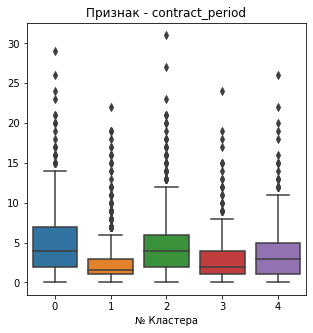

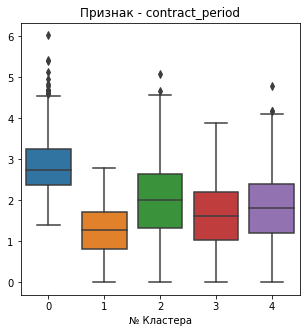

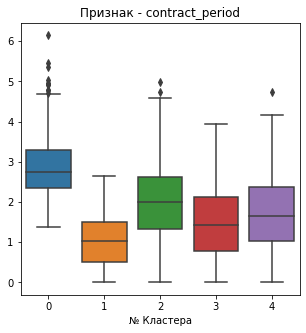

In [51]:
for column in ['month_to_end_contract', 
               'age', 
               'avg_additional_charges_total', 
               'lifetime', 
               'avg_class_frequency_total',
               'avg_class_frequency_current_month']:
    
    plt.figure(figsize=(5, 5))
    sns.boxplot(x='cluster', y=df[column], data=df)
    plt.title('Признак - ' + 'contract_period')
    plt.xlabel('№ Кластера')
    plt.ylabel('')
    plt.show()

<div class="alert alert-info">
    <h2> Комментарий учащегося</h2>
    
В целом графики подтверждают сделанные ранее выводы.

</div>

##  Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

<div class="alert alert-info">
    <h2> Комментарий учащегося</h2>
    
<b>Основные выводы</b>:

- нет зависимости между уходом клиента и его полом или наличием его телефона в базе клиентов
- есть связь между уходом клиента и тем, являлся ли клиент сотрудником компании-партнера
- есть зависимость между вероятностью оттока и тем фактом, пришел ли он по акции "приведи друга"
- есть зависимость между вероятностью оттока и тем, живет/работает ли он недалеко от центра
- есть зависимость между вероятностью оттока и тем, посещал ли он групповые занятия
- ушедших клиентов в подавляющем большинстве случаев был короткий абонемент на месяц
- частота посещения зала у ушедших в среднем была ниже, чем у тех, кто остался
- ушедшие клиенты в среднем моложе оставшихся
- короткий lifetime у ушедших клиентов обусловлен короткими абонементами у этих клиентов, и его недостаточно для конвертации клиента в постоянного пользователя центра
- в среднем траты на доп.услуги ниже у ушедших клиентов

<b>Остающийся клиент это</b>:

- обладатель 12-месячного абонемента, сотрудник компании-партнера, участник промо-программы, посетитель групповых занятий

    либо

- обладатель абонемента на 3 месяца, но продолжающий занятия и продлевающий контракт

<b>Рекомендации для стратегии взаимодействия с пользователями и их удержания</b>:

- необходимо стимулировать частоту посещения центра в начале контракта (в первые месяцы) - предоставлять бесплатные занятия с тренером, пробные групповые занятия, возможно ввести пообщрения за регулярное посещение центра без пропусков в виде бесплатаных бонусных услуг (или подарков)

- необходимо стимулировать текущих клиентов использовать акцию "приведи друга" (возможно, проводить какие-то ивенты, куда можно приводить друзей, либо вводить бонусы за каждого привлеченного друга - в виде продления текущего контракта для того, кто привлек нового клиента)

- необходимо развивать канал привлечения через компании-партнеры, расположенные ближе к центрам сети (и не тратить маркетинговые ресурсы на тех, кто живет и работает не близко к центрам)

- необходимо отслеживать вовлеченность в групповые занятия, и в случае прекращения клиентом посещения того или иного группового занятия, стараться предлагать альтернативы

- приоритетно продавать длинные контракты (разработать программы рассрочки для тех, кто выбирает короткие абонементы из-за затруднений с оплатой полного контракта на длительный период), апгрейдить на выгодных условиях текущий короткий абонемент до длительного



</div>